In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\Agriqo(slider1) - Sheet1.csv"

data = pd.read_csv(data_dir)

col = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12']
data.drop(columns=col, axis=1, inplace=True)

In [93]:
import numpy as np

augmented_data = []

for index, row in data.iterrows():
    for _ in range(8):
        new_row = {
            'Agricultural zone': row['Agricultural zone'],
            'month(chara)': row['month(chara)'],
            'rainfall (mm)': row['rainfall (mm)'] + np.random.uniform(-5, 5),
            'temperature(avg)': row['temperature(avg)'] + np.random.uniform(-2, 2),
            'humidity(avg)': row['humidity(avg)'] + np.random.uniform(-10, 10),
            'sunlight(hour)': row['sunlight(hour)'],
            'direction of wind(deg)': row['direction of wind(deg)'] + np.random.uniform(-35, 35),
            'velocity of wind(km/h)': row['velocity of wind(km/h)'] + np.random.uniform(-5, 5),
            'label': row['label']
        }
        augmented_data.append(new_row)

augmented_data_df = pd.DataFrame(augmented_data)

print(f"Total number of rows in augmented data: {len(augmented_data_df)}")


Total number of rows in augmented data: 2984


In [94]:
data = pd.concat([data, augmented_data_df], ignore_index=True)

In [95]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cols_to_encode = ['Agricultural zone', 'label']

label_encoders = {}

label_encoders = {}
label_mappings = {}

for col in cols_to_encode:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    label_encoders[col] = encoder
    label_mappings[col] = {class_: i for i, class_ in enumerate(encoder.classes_)}

for col, mapping in label_mappings.items():
    print(f"\nLabel mapping for '{col}':\n{mapping}")

data.head()    



Label mapping for 'Agricultural zone':
{'Barisal': 0, 'Bogra': 1, 'Chittagonj': 2, 'Cumilla': 3, 'Dhaka': 4, 'Dinajpur': 5, 'Faridpur': 6, 'Jashore': 7, 'Khulna': 8, 'Mymensingh': 9, 'Rajshahi': 10, 'Rangamati': 11, 'Rangpur': 12, 'Sylhet': 13}

Label mapping for 'label':
{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Tula': 20, 'Wheat': 21, 'corn khorip-1': 22, 'garlic': 23, 'indian jujube': 24, 'jackfruit': 25, 'jute': 26, 'khorip green chilli': 27, 'khorip lau (grourd)': 28, 'khorip onion': 29, 'khorip pointed grourd': 30, 'khorip pumpkin Cucurbita': 31, 'licchi': 32, 'masterd seed': 33, 'papaya': 34, 'pineapple': 35, 'robi green chilli ': 36, 'robi lau (gourd)': 37, 'robi onion': 38, 'robi pointed gourd

,Agricultural zone,month(chara),rainfall (mm),temperature(avg),humidity(avg),sunlight(hour),direction of wind(deg),velocity of wind(km/h),label
0,0,7.50,111.7,28.5,88.4,23.3,175.0,6.5,0
1,1,8.00,63.3,29.3,83.6,35.0,137.0,6.3,0
2,2,7.00,201.7,28.0,86.9,24.0,173.0,10.7,0
3,3,7.50,107.0,28.5,86.0,26.5,174.0,7.0,0
4,4,7.25,73.5,29.1,83.0,32.0,159.0,5.9,0


In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics

X = data.drop(['label'],axis=1)
y = data['label']

X_t, X_val, y_t, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.preprocessing import RobustScaler

to_scale = ['rainfall (mm)', 'temperature(avg)', 'humidity(avg)',
            'sunlight(hour)', 'direction of wind(deg)', 'velocity of wind(km/h)']

scaler = RobustScaler()

X_t[to_scale] = scaler.fit_transform(X_t[to_scale])

X_val[to_scale] = scaler.transform(X_val[to_scale])

In [101]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax'),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [102]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'micro')
    recall = recall_score(y_test, y_pred,average = 'micro')
    f1 = f1_score(y_test, y_pred,average = 'micro')
    cm = confusion_matrix(y_test, y_pred)
    # print(cm)
    # sns.heatmap(cm, annot=True, fmt='d')
    # plt.show()

    # Visualization
    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

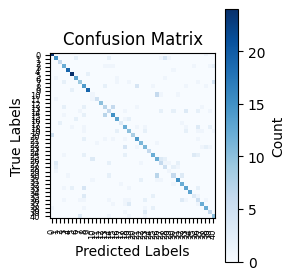

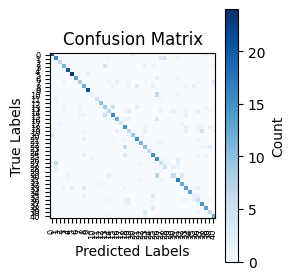

KeyboardInterrupt: 

In [103]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_t, y_t, X_val, y_val)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data